# 4IF Data Mining Lab

## Project detail
The project has been carried out in pairs, during 3 practical sessions lasting 4h each. We have implemented code using Python, which is commonly used for most data mining tasks thanks to many packages: `scikit-learn` (sklearn) providing many learning algorithms and clustering algorithms, as well as `Natural Language Toolkit` (nltk) to tackle text processing tasks. This document is an experimentation report stating our main results, as well as discussions about our different choices.

<a id="dependencies-section"></a>
## Dependencies 

We recommand usage of a [virtual environment](https://docs.python.org/3/library/venv.html) to run this notebook, since we are using many packages.

In [3]:
# installation of required libraries and dependencies
# numeric calculations
! pip install numpy==1.26.0 
# data frames 
! pip3 install pandas==2.1.1 
# machine learning algorithms 
! pip install scikit-learn==1.5.1 
! pip install scipy==1.12.0

# plotting 
! pip install plotly==5.24.1 
! pip install matplotlib==3.8.0 
! pip install plotly-express==0.4.1 
! pip install chart-studio==1.1.0 
# web app library 
! pip install streamlit==1.37.1 
#maping library
! pip install folium
# association rules
! pip install mlxtend==0.23.3

! pip install nbformat==5.9.2 


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# load pandas to deal with the data
import pandas as pd
# plotting
import matplotlib.pyplot as plt

# mapping
import folium
import numpy as np

In [5]:
# opening data from the social network "flickr"
data = pd.read_csv("flickr_data2.csv", sep=",")
data.head()

C:\Users\flofl\AppData\Local\Temp\ipykernel_7088\3210405139.py:2: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("flickr_data2.csv", sep=",")


id          user        lat      long  \
0  4395181099  30624617@N03  45.754858  4.821710   
1  4394748717  35853470@N00  45.753270  4.862953   
2  4394694699  11817998@N05  45.760655  4.846564   
3  4394803790  11545749@N06  45.784000  4.874072   
4  4394803554  11545749@N06  45.784000  4.874072   

                                                tags  \
0                 chair,lyon,rhône,chaise,rhônealpes   
1                                                NaN   
2                                         365,iphone   
3       nin,nineinchnails,gift,screening,toiou,avott   
4  lyon,nin,nineinchnails,gift,screening,toiou,avott   

                         title   date_taken_minute   date_taken_hour  \
0             Chaises avec vue                11.0                15   
1                          NaN                51.0                17   
2       59/365 - R46 V103 B163                29.0                17   
3  2010-01-29 Toiou Avott Lyon                15.0                20   
4  2010-01-28 Toiou Avott Lyon                10.0                20   

    date_taken_day   date_taken_month   date_taken_year  date_upload_minute  \
0               28                  2              2010                  23   
1               28                  2              2010                  52   
2               28                  2              2010                  33   
3               28                  1              2010                  38   
4               28                  1              2010                  38   

   date_upload_hour   date_upload_day   date_upload_month   date_upload_year  \
0                20              28.0                   2             2010.0   
1                17              28.0                   2             2010.0   
2                17              28.0                   2             2010.0   
3                12              28.0                   2             2010.0   
4                12              28.0                   2             2010.0   

   Unnamed: 16  Unnamed: 17  Unnamed: 18  
0          NaN          NaN          NaN  
1          NaN          NaN          NaN  
2          NaN          NaN          NaN  
3          NaN          NaN          NaN  
4          NaN          NaN          NaN

<a id="data-cleaning-section"></a>
## Data Cleaning 

### Incoherent Data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420240 entries, 0 to 420239
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   420240 non-null  int64  
 1    user                420240 non-null  object 
 2    lat                 420240 non-null  float64
 3    long                420240 non-null  float64
 4    tags                316730 non-null  object 
 5    title               381911 non-null  object 
 6    date_taken_minute   420239 non-null  float64
 7    date_taken_hour     420240 non-null  int64  
 8    date_taken_day      420240 non-null  int64  
 9    date_taken_month    420240 non-null  int64  
 10   date_taken_year     420240 non-null  int64  
 11   date_upload_minute  420228 non-null  object 
 12   date_upload_hour    420238 non-null  object 
 13   date_upload_day     420238 non-null  float64
 14   date_upload_month   420240 non-null  int64  
 15   date_upload_year

We can see that a few columns aren't intersting, because there is no title and most of the rows have a `null` value for this attribute. We can suppose that these unwanted columns have apappeared due to poor formatting and conflicts with the `.csv` format. 

In [7]:
# all unwanted columns 
unnamed_columns = data.columns[data.columns.str.contains('^Unnamed')]

number_of_wrong_records = data[unnamed_columns].count().sum()
total_number_of_records = data["id"].count()

print(f"Percentages of rows with values in unwanted columns: {number_of_wrong_records*100/total_number_of_records:.3f}%")

Percentages of rows with values in unwanted columns: 0.034%


As the number of rows impacted by this error is very limited, we consider that removing these rows will be more efficient than trying to correct them.

In [8]:
data = data.loc[~data["Unnamed: 16"].notna(),:]
data = data.loc[~data["Unnamed: 17"].notna(),:]
data = data.loc[~data["Unnamed: 18"].notna(),:]
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 420098 entries, 0 to 420239
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   420098 non-null  int64  
 1    user                420098 non-null  object 
 2    lat                 420098 non-null  float64
 3    long                420098 non-null  float64
 4    tags                316635 non-null  object 
 5    title               381777 non-null  object 
 6    date_taken_minute   420098 non-null  float64
 7    date_taken_hour     420098 non-null  int64  
 8    date_taken_day      420098 non-null  int64  
 9    date_taken_month    420098 non-null  int64  
 10   date_taken_year     420098 non-null  int64  
 11   date_upload_minute  420098 non-null  object 
 12   date_upload_hour    420098 non-null  object 
 13   date_upload_day     420098 non-null  float64
 14   date_upload_month   420098 non-null  int64  
 15   date_upload_year    4

Then we can remove corresponding columns.

In [9]:
data=data.drop(columns=unnamed_columns)
data.columns

Index(['id', ' user', ' lat', ' long', ' tags', ' title', ' date_taken_minute',
       ' date_taken_hour', ' date_taken_day', ' date_taken_month',
       ' date_taken_year', ' date_upload_minute', ' date_upload_hour',
       ' date_upload_day', ' date_upload_month', ' date_upload_year'],
      dtype='object')

We also can see a problem with the name of atributes. Except for the `"id"`, each column name begins with a spacebar character (ex: `" user"`), which isn't convenient for the following steps. We can easily get rid of it:

In [10]:
data=data.rename(columns=lambda x: x.strip())
data.columns

Index(['id', 'user', 'lat', 'long', 'tags', 'title', 'date_taken_minute',
       'date_taken_hour', 'date_taken_day', 'date_taken_month',
       'date_taken_year', 'date_upload_minute', 'date_upload_hour',
       'date_upload_day', 'date_upload_month', 'date_upload_year'],
      dtype='object')

<a id="missing-vals"></a>
### Missing Values

We can see that a few records don't have value for `"tags"` and/or `"title"`. It is not a problem while we are not considering [NLP](https://en.wikipedia.org/wiki/Natural_language_processing). We still need to keep that in mind for later treatments. Besides we can note another `"null"` value for one record on the attribute: `"date_upload_year"`. 

In [11]:
data[data["date_upload_year"].isnull()]

id          user        lat     long  \
42366  5464485473  35635047@N03  45.765517  4.76651   

                            tags                                       title  \
42366  lundimatin,lyondefi38nuit  une lundi matin comme tout les autre ;-(25   

       date_taken_minute  date_taken_hour  date_taken_day  date_taken_month  \
42366                6.0               21               2              2011   

       date_taken_year date_upload_minute date_upload_hour  date_upload_day  \
42366               11                 15               21              2.0   

       date_upload_month  date_upload_year  
42366               2011               NaN

In [12]:
data = data.loc[~data["date_upload_year"].isnull(),:]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420097 entries, 0 to 420239
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  420097 non-null  int64  
 1   user                420097 non-null  object 
 2   lat                 420097 non-null  float64
 3   long                420097 non-null  float64
 4   tags                316634 non-null  object 
 5   title               381776 non-null  object 
 6   date_taken_minute   420097 non-null  float64
 7   date_taken_hour     420097 non-null  int64  
 8   date_taken_day      420097 non-null  int64  
 9   date_taken_month    420097 non-null  int64  
 10  date_taken_year     420097 non-null  int64  
 11  date_upload_minute  420097 non-null  object 
 12  date_upload_hour    420097 non-null  object 
 13  date_upload_day     420097 non-null  float64
 14  date_upload_month   420097 non-null  int64  
 15  date_upload_year    420097 non-null  fl

<a id="duplicates"></a>
### Duplicates

Most of the records are duplicated, because a user can upload many pictures of the same place in a short amount of time (example below). But we only need one occurrence of metadata for a given position at a specific moment. Hence we use the [`duplicated()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html) method.

In [13]:
# only checking the duplicates for the selected attributes
columns_for_duplicates=['user', 'lat', 'long','date_taken_hour',
                        'date_taken_day', 'date_taken_month',
                        'date_taken_year', 'date_upload_minute',
                        'date_upload_hour', 'date_upload_day',
                        'date_upload_month', 'date_upload_year']
data=data.drop_duplicates(subset=columns_for_duplicates)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125445 entries, 0 to 420239
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  125445 non-null  int64  
 1   user                125445 non-null  object 
 2   lat                 125445 non-null  float64
 3   long                125445 non-null  float64
 4   tags                91436 non-null   object 
 5   title               112193 non-null  object 
 6   date_taken_minute   125445 non-null  float64
 7   date_taken_hour     125445 non-null  int64  
 8   date_taken_day      125445 non-null  int64  
 9   date_taken_month    125445 non-null  int64  
 10  date_taken_year     125445 non-null  int64  
 11  date_upload_minute  125445 non-null  object 
 12  date_upload_hour    125445 non-null  object 
 13  date_upload_day     125445 non-null  float64
 14  date_upload_month   125445 non-null  int64  
 15  date_upload_year    125445 non-null  fl

We can now realise that a lot of data wasn't usefull for any relevant analyse. Most of the cleaning work is now done so cleaned data can be saved in a new dataframe.

In [15]:
number_of_records_after_cleaning = data["id"].count()
records_kept_percentage = number_of_records_after_cleaning*100/total_number_of_records
print(f"Percentages of records kept after cleaning: {records_kept_percentage:.3f}%")

Percentages of records kept after cleaning: 29.851%


In [16]:
# save to file
data.to_csv('./data_cleaned.csv',index=False)
data_cleaned = pd.read_csv("data_cleaned.csv", sep=",")


In [17]:
m = folium.Map([45.762611,4.832805	], zoom_start=12)

data_sample = data_cleaned.sample(1000)

for index, row in data_sample.iterrows():
    folium.Marker(
        location=[row["lat"],row["long"]],
        icon=folium.DivIcon(html=f"""<svg width="20px" height="20px" viewBox="0 0 24 24" fill="none" xmlns="http://www.w3.org/2000/svg">
        <path d="M12 9.5C13.3807 9.5 14.5 10.6193 14.5 12C14.5 13.3807 13.3807 14.5 12 14.5C10.6193 14.5 9.5 13.3807 9.5 12C9.5 10.6193 10.6193 9.5 12 9.5Z" fill="#8b0000"/>
        </svg>""")
    ).add_to(m)

m

To obtain the statistical summary of the dataframe, we can use [`describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html). Some of the values aren't relevant, but we can focus on certain metrics to explore the dataset.

In [18]:
# summarised statistics
data_summary = data_cleaned.describe()
data_summary

id            lat           long  date_taken_minute  \
count  1.254450e+05  125445.000000  125445.000000      125445.000000   
mean   1.943034e+10      45.764326       4.837632          29.426075   
std    1.415394e+10       0.023295       0.029665          17.576730   
min    3.066675e+08      45.655200       4.720312           0.000000   
25%    7.074764e+09      45.757508       4.826248          14.000000   
50%    1.421363e+10      45.762611       4.832805          30.000000   
75%    3.136933e+10      45.770404       4.842975          45.000000   
max    4.914809e+10      45.854950       5.006709          59.000000   

       date_taken_hour  date_taken_day  date_taken_month  date_taken_year  \
count    125445.000000   125445.000000     125445.000000    125445.000000   
mean         14.773391       15.126717          7.126629      2013.891945   
std           4.992414        8.672270          3.489012         3.209435   
min           0.000000        1.000000          1.000000      1926.000000   
25%          12.000000        8.000000          4.000000      2012.000000   
50%          15.000000       14.000000          7.000000      2014.000000   
75%          18.000000       23.000000         10.000000      2017.000000   
max          23.000000       31.000000         12.000000      2238.000000   

       date_upload_minute  date_upload_hour  date_upload_day  \
count       125445.000000     125445.000000    125445.000000   
mean            29.471410         14.687249        15.652525   
std             17.262973          6.615819         8.517690   
min              0.000000          0.000000         1.000000   
25%             15.000000         11.000000         9.000000   
50%             30.000000         16.000000        15.000000   
75%             44.000000         20.000000        23.000000   
max             59.000000         23.000000        31.000000   

       date_upload_month  date_upload_year  
count      125445.000000     125445.000000  
mean            6.831879       2014.238072  
std             3.616347          2.854888  
min             1.000000       2009.000000  
25%             4.000000       2012.000000  
50%             7.000000       2014.000000  
75%            10.000000       2017.000000  
max            12.000000       2019.000000

We can see that values for dates are compliant with expectations (example: `"date_taken_hour"` between 0h and 23h with a mean around 15h). Yet it seems that an error appeard for the maximum value of `"date_taken_year"`. Indeed, it's unlikely that a photo was taken in the year 2238.

In [19]:
data_cleaned[data_cleaned["date_taken_year"] == 2238]

id          user        lat      long tags title  \
32647  7690629716  83991262@N03  45.750606  4.835368  NaN   NaN   

       date_taken_minute  date_taken_hour  date_taken_day  date_taken_month  \
32647               46.0                5              16                 2   

       date_taken_year  date_upload_minute  date_upload_hour  date_upload_day  \
32647             2238                57.0                13              1.0   

       date_upload_month  date_upload_year  
32647                  8            2012.0

As we can't determine the correct value for this record, we better remove it from the dataset.

In [20]:
index=data_cleaned[data_cleaned['date_taken_year'] == 2238].index
data_cleaned = data_cleaned.drop(index=index,axis=1)
taken_years = data_cleaned["date_taken_year"].unique()
uploded_years = data_cleaned["date_upload_year"].unique()
print(f" When pictures are taken : {taken_years}\n")
print(f" When pictures are uploaded : {uploded_years}")

 When pictures are taken : [2010 2009 2007 2008 2006 2002 2004 2005 1976 1995 2012 1998 1989 1957
 1977 1979 2014 2001 1991 2011 2013 1980 2003 1985 1981 1997 1974 2015
 1926 1930 1938 1935 1968 1972 1970 1983 1988 1973 2000 2017 2016 1969
 1993 2018 1982 1965 1996 1966 2019]

 When pictures are uploaded : [2010. 2009. 2011. 2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019.]


It's interesting to note that pictures can have been taken a long time before the year of upload. This will be taken into account for the last part of this project (considering the effect of time on areas of interest).

We can now save the cleaned data again and crate another dataframe only dedicated to spacial clusturing.

In [21]:
data_cleaned.to_csv('./data_cleaned.csv',index=False)
coordinates_df = data_cleaned[["id", "lat", "long"]]
coordinates_df

id        lat      long
0        4395181099  45.754858  4.821710
1        4394748717  45.753270  4.862953
2        4394694699  45.760655  4.846564
3        4394803790  45.784000  4.874072
4        4394566432  45.755940  4.833158
...             ...        ...       ...
125440  44402328654  45.758316  4.825197
125441  44210748275  45.762635  4.837299
125442  45122361361  45.763657  4.836012
125443  45073351222  45.763657  4.836012
125444  45122093111  45.758181  4.831967

[125444 rows x 3 columns]

## Prepare Data for Clustering

Even though in our case the attributes have comparable scales, let's apply a [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Recall, that for a given value `x`, a standard score is given by $z = \frac{x - mean(\mathbf{x})}{std(\mathbf{x})}$ 

In [22]:
# scaler
from sklearn.preprocessing import StandardScaler

In [23]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(coordinates_df[["lat", "long"]])
# show
print(scaled_data)
# create a DataFrame
scaled_coordinates_df = pd.DataFrame(data=coordinates_df)
scaled_coordinates_df[['scaled_lat', 'scaled_long']] = scaled_data
scaled_coordinates_df

[[-0.4064356  -0.53671938]
 [-0.47460442  0.85355049]
 [-0.15758507  0.30108988]
 ...
 [-0.02871681 -0.05460994]
 [-0.02871681 -0.05460994]
 [-0.26378762 -0.19096379]]


id        lat      long  scaled_lat  scaled_long
0        4395181099  45.754858  4.821710   -0.406436    -0.536719
1        4394748717  45.753270  4.862953   -0.474604     0.853550
2        4394694699  45.760655  4.846564   -0.157585     0.301090
3        4394803790  45.784000  4.874072    0.844557     1.228363
4        4394566432  45.755940  4.833158   -0.359988    -0.150816
...             ...        ...       ...         ...          ...
125440  44402328654  45.758316  4.825197   -0.257992    -0.419175
125441  44210748275  45.762635  4.837299   -0.072589    -0.011226
125442  45122361361  45.763657  4.836012   -0.028717    -0.054610
125443  45073351222  45.763657  4.836012   -0.028717    -0.054610
125444  45122093111  45.758181  4.831967   -0.263788    -0.190964

[125444 rows x 5 columns]

## Apply k-means Clustering

To apply **k-means clustering**, we are going to use [`sklearn.cluster.KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

In [22]:
# k-means
from sklearn.cluster import KMeans

As k-means clusering relies on the parameter `k`, we can use the `Elbow Method` to approach the optimal value for `k`. `inertia` is used to measure the distance between each record from the center of its cluster.

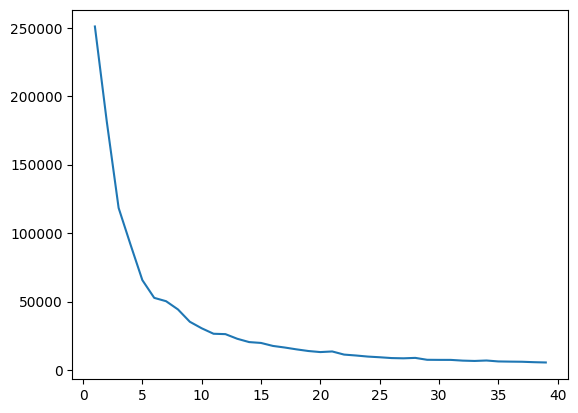

[250887.99999999348,
 181575.08478021703,
 118358.97204011006,
 91664.6256546179,
 65647.94852181754,
 52701.75448939818,
 50247.23707036254,
 44248.28524481227,
 35239.064720481794,
 30471.021668220244,
 26478.07380180881,
 26204.523672569005,
 22811.961039694837,
 20396.98237383327,
 19770.965377101926,
 17594.194228024237,
 16426.76244527262,
 15072.232091061232,
 13868.538649817836,
 13099.376297888655,
 13551.17427825365,
 11263.33222153353,
 10603.954767291863,
 9811.788550328882,
 9317.338571023734,
 8725.958050904417,
 8543.27502154846,
 8856.48175325567,
 7465.666437711835,
 7400.846117140734,
 7389.87568415867,
 6855.506325788401,
 6615.994034616611,
 6946.053429535803,
 6265.255721859749,
 6129.187145668356,
 6032.176115832359,
 5719.0177426273185,
 5504.322084545791]

In [23]:
inertias = []
for i in range(1,40):
  kmeans=KMeans(n_clusters=i,init='k-means++')
  kmeans.fit(scaled_coordinates_df[["scaled_lat", "scaled_long"]])
  inertias.append(kmeans.inertia_)

plt.plot(range(1,40),inertias)
plt.show()
inertias

It seems that optimal values for `k` are arround 8 clusters. Thus let's try to visualize the effect of this value.

In [24]:
k = 8
kmeans=KMeans(n_clusters=k,init='k-means++')
kmeans.fit(scaled_coordinates_df[["scaled_lat", "scaled_long"]])
scaled_coordinates_df["k_means_clusters"] = kmeans.labels_
scaled_coordinates_df


id        lat      long  scaled_lat  scaled_long  \
0        4395181099  45.754858  4.821710   -0.406436    -0.536719   
1        4394748717  45.753270  4.862953   -0.474604     0.853550   
2        4394694699  45.760655  4.846564   -0.157585     0.301090   
3        4394803790  45.784000  4.874072    0.844557     1.228363   
4        4394566432  45.755940  4.833158   -0.359988    -0.150816   
...             ...        ...       ...         ...          ...   
125440  44402328654  45.758316  4.825197   -0.257992    -0.419175   
125441  44210748275  45.762635  4.837299   -0.072589    -0.011226   
125442  45122361361  45.763657  4.836012   -0.028717    -0.054610   
125443  45073351222  45.763657  4.836012   -0.028717    -0.054610   
125444  45122093111  45.758181  4.831967   -0.263788    -0.190964   

        k_means_clusters  
0                      0  
1                      5  
2                      0  
3                      5  
4                      0  
...                  ...  
125440                 0  
125441                 0  
125442                 0  
125443                 0  
125444                 0  

[125444 rows x 6 columns]

In [25]:
m = folium.Map([45.762611,4.832805], zoom_start=12)

scaled_coordinates_sample = scaled_coordinates_df.sample(5000)

colors = plt.cm.get_cmap("hsv", k)

cluster_colors = {cluster: f"#{int(colors(i)[0]*255):02x}{int(colors(i)[1]*255):02x}{int(colors(i)[2]*255):02x}" 
                  for i, cluster in enumerate(sorted(scaled_coordinates_sample["k_means_clusters"].unique()))}

for index, row in scaled_coordinates_sample.iterrows():
    cluster_color = cluster_colors[row["k_means_clusters"]]
    folium.Marker(
        location=[row["lat"],row["long"]],
        icon=folium.DivIcon(html=f"""<svg width="20px" height="20px" viewBox="0 0 24 24" fill="none" xmlns="http://www.w3.org/2000/svg">
        <path d="M12 9.5C13.3807 9.5 14.5 10.6193 14.5 12C14.5 13.3807 13.3807 14.5 12 14.5C10.6193 14.5 9.5 13.3807 9.5 12C9.5 10.6193 10.6193 9.5 12 9.5Z" fill="{cluster_color}"/>
        </svg>""")
    ).add_to(m)

centers = scaler.inverse_transform(kmeans.cluster_centers_)

for i in centers:
    folium.Marker(
        location=[i[0],i[1]],
        icon=folium.DivIcon(html=f"""<svg width="60px" height="60px" viewBox="0 0 24 24" fill="none" xmlns="http://www.w3.org/2000/svg">
        <path d="M12 9.5C13.3807 9.5 14.5 10.6193 14.5 12C14.5 13.3807 13.3807 14.5 12 14.5C10.6193 14.5 9.5 13.3807 9.5 12C9.5 10.6193 10.6193 9.5 12 9.5Z" fill="#0b5555"/>
        </svg>""")
    ).add_to(m)

m.save("kmeans_clustering_8.html")

C:\Users\flofl\AppData\Local\Temp\ipykernel_11024\1054453976.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("hsv", k)


In [2]:
from sklearn.metrics import silhouette_score, silhouette_samples

It seems pretty obvious that 8 isn't a good value for the number of cluster, because there is probably more than 8 points of interest in Lyon... We could have expected for the main districts of Lyon to be separated clearly but it isn't even the case.

We will therefore try another method to find a better value for `k` (as the silhouette coefficient), but it would be tedious because we can only evaluate the results one by one for each values of `k`. We will reduce the sample to 10 000 elements. 

In [76]:
def find_best_k(data, k_range):
    avg_silhouette_scores = [0 for i in range(len(k_range))]
    avg_min_silhouette_list = [0 for i in range(len(k_range))]
    for i in range (5):
        silhouette_scores = []
        min_silhouette_list = []

        for k in k_range:
            kmeans = KMeans(n_clusters=k, init='k-means++')
            kmeans.fit(data[["scaled_lat", "scaled_long"]])
            labels = kmeans.labels_
            silhouettes_vector = silhouette_samples(data[["scaled_lat", "scaled_long"]], labels)
            silhouettes_df = pd.DataFrame({"labels": labels, "silhouette_scores": silhouettes_vector})
            score = silhouettes_df["silhouette_scores"].mean()
            max_silhouette_list = silhouettes_df.groupby("labels")["silhouette_scores"].max().values
            min_silhouette_list.append(max_silhouette_list.min())
            silhouette_scores.append(score)
        for i in range(len(silhouette_scores)):
            avg_silhouette_scores[i] = avg_silhouette_scores[i] + 1/5 * silhouette_scores[i]
            avg_min_silhouette_list[i] = avg_min_silhouette_list[i] + 1/5 * min_silhouette_list[i]
            
    df = pd.DataFrame({"scores": avg_silhouette_scores, "min_silhouettes": avg_min_silhouette_list})
    return(df)

In [81]:
Kmeans_scaled_coordinates_df = scaled_coordinates_df.sample(10000)

k_values = range(20,300,25)
silhouette_scores = find_best_k(Kmeans_scaled_coordinates_df, k_values)

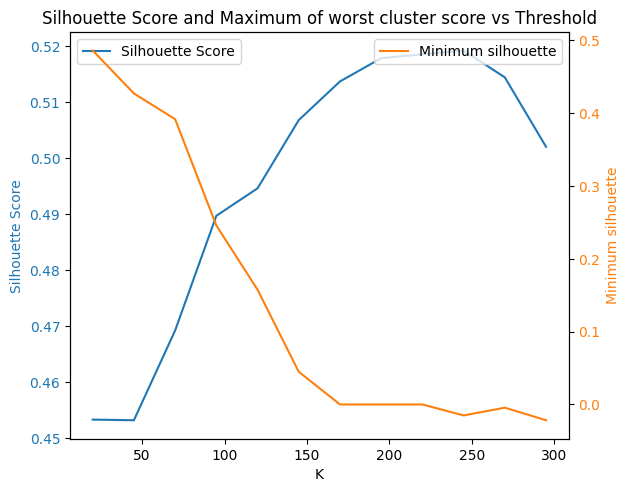

In [82]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('K')
ax1.set_ylabel('Silhouette Score', color=color)
ax1.plot(k_values, silhouette_scores["scores"], label='Silhouette Score', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Minimum silhouette', color=color)
ax2.plot(k_values, silhouette_scores["min_silhouettes"], label='Minimum silhouette', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()
plt.title('Silhouette Score and Maximum of worst cluster score vs Threshold')
plt.show()

In [89]:
k_values = range(100,120,2)
silhouette_scores = find_best_k(Kmeans_scaled_coordinates_df, k_values)

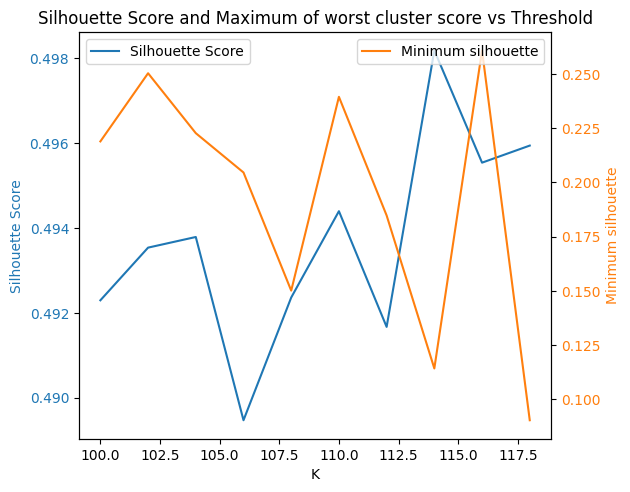

In [90]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('K')
ax1.set_ylabel('Silhouette Score', color=color)
ax1.plot(k_values, silhouette_scores["scores"], label='Silhouette Score', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Minimum silhouette', color=color)
ax2.plot(k_values, silhouette_scores["min_silhouettes"], label='Minimum silhouette', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()
plt.title('Silhouette Score and Maximum of worst cluster score vs Threshold')
plt.show()

In [93]:
k = 115
kmeans=KMeans(n_clusters=k,init='k-means++')
kmeans.fit(scaled_coordinates_df[["scaled_lat", "scaled_long"]])
scaled_coordinates_df["k_means_clusters"] = kmeans.labels_
m = folium.Map([45.762611,4.832805], zoom_start=12)

scaled_coordinates_sample = scaled_coordinates_df.sample(2000)

colors = plt.cm.get_cmap("hsv", k)

cluster_colors = {cluster: f"#{int(colors(i)[0]*255):02x}{int(colors(i)[1]*255):02x}{int(colors(i)[2]*255):02x}" 
                  for i, cluster in enumerate(sorted(scaled_coordinates_sample["k_means_clusters"].unique()))}

for index, row in scaled_coordinates_sample.iterrows():
    cluster_color = cluster_colors[row["k_means_clusters"]]
    folium.Marker(
        location=[row["lat"],row["long"]],
        icon=folium.DivIcon(html=f"""<svg width="20px" height="20px" viewBox="0 0 24 24" fill="none" xmlns="http://www.w3.org/2000/svg">
        <path d="M12 9.5C13.3807 9.5 14.5 10.6193 14.5 12C14.5 13.3807 13.3807 14.5 12 14.5C10.6193 14.5 9.5 13.3807 9.5 12C9.5 10.6193 10.6193 9.5 12 9.5Z" fill="{cluster_color}"/>
        </svg>""")
    ).add_to(m)

centers = scaler.inverse_transform(kmeans.cluster_centers_)

for i in centers:
    folium.Marker(
        location=[i[0],i[1]],
        icon=folium.DivIcon(html=f"""<svg width="60px" height="60px" viewBox="0 0 24 24" fill="none" xmlns="http://www.w3.org/2000/svg">
        <path d="M12 9.5C13.3807 9.5 14.5 10.6193 14.5 12C14.5 13.3807 13.3807 14.5 12 14.5C10.6193 14.5 9.5 13.3807 9.5 12C9.5 10.6193 10.6193 9.5 12 9.5Z" fill="#0b5555"/>
        </svg>""")
    ).add_to(m)

m.save("kmeans_clustering_115.html")

C:\Users\flofl\AppData\Local\Temp\ipykernel_11024\3262864474.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("hsv", k)


In [91]:
k_values = range(20,40,2)
silhouette_scores = find_best_k(Kmeans_scaled_coordinates_df, k_values)

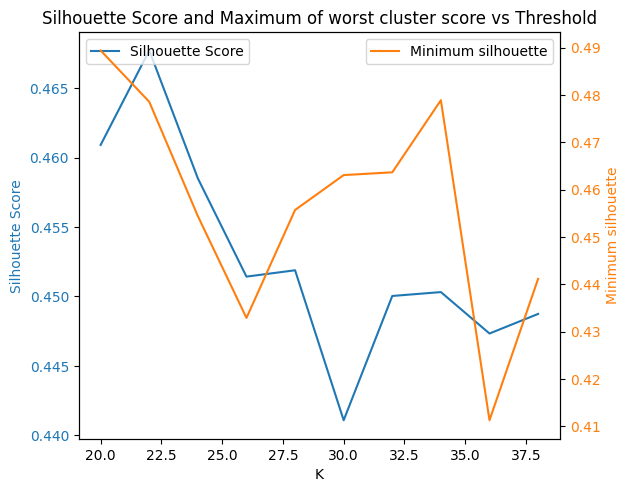

In [92]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('K')
ax1.set_ylabel('Silhouette Score', color=color)
ax1.plot(k_values, silhouette_scores["scores"], label='Silhouette Score', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Minimum silhouette', color=color)
ax2.plot(k_values, silhouette_scores["min_silhouettes"], label='Minimum silhouette', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()
plt.title('Silhouette Score and Maximum of worst cluster score vs Threshold')
plt.show()

In [94]:
k = 23
kmeans=KMeans(n_clusters=k,init='k-means++')
kmeans.fit(scaled_coordinates_df[["scaled_lat", "scaled_long"]])
scaled_coordinates_df["k_means_clusters"] = kmeans.labels_
m = folium.Map([45.762611,4.832805], zoom_start=12)

scaled_coordinates_sample = scaled_coordinates_df.sample(2000)

colors = plt.cm.get_cmap("hsv", k)

cluster_colors = {cluster: f"#{int(colors(i)[0]*255):02x}{int(colors(i)[1]*255):02x}{int(colors(i)[2]*255):02x}" 
                  for i, cluster in enumerate(sorted(scaled_coordinates_sample["k_means_clusters"].unique()))}

for index, row in scaled_coordinates_sample.iterrows():
    cluster_color = cluster_colors[row["k_means_clusters"]]
    folium.Marker(
        location=[row["lat"],row["long"]],
        icon=folium.DivIcon(html=f"""<svg width="20px" height="20px" viewBox="0 0 24 24" fill="none" xmlns="http://www.w3.org/2000/svg">
        <path d="M12 9.5C13.3807 9.5 14.5 10.6193 14.5 12C14.5 13.3807 13.3807 14.5 12 14.5C10.6193 14.5 9.5 13.3807 9.5 12C9.5 10.6193 10.6193 9.5 12 9.5Z" fill="{cluster_color}"/>
        </svg>""")
    ).add_to(m)

centers = scaler.inverse_transform(kmeans.cluster_centers_)

for i in centers:
    folium.Marker(
        location=[i[0],i[1]],
        icon=folium.DivIcon(html=f"""<svg width="60px" height="60px" viewBox="0 0 24 24" fill="none" xmlns="http://www.w3.org/2000/svg">
        <path d="M12 9.5C13.3807 9.5 14.5 10.6193 14.5 12C14.5 13.3807 13.3807 14.5 12 14.5C10.6193 14.5 9.5 13.3807 9.5 12C9.5 10.6193 10.6193 9.5 12 9.5Z" fill="#0b5555"/>
        </svg>""")
    ).add_to(m)

m.save("kmeans_clustering_23.html")

C:\Users\flofl\AppData\Local\Temp\ipykernel_11024\220174655.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("hsv", k)


## Hierarchical Clustering

In [163]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [164]:
hierarchical_coordinates_sample = scaled_coordinates_df.sample(10000)

n_clusters = 115
linkages = ['ward','complete', 'average', 'single']
for link in linkages:
  agglomerative_clustering = AgglomerativeClustering(n_clusters=n_clusters,distance_threshold=None,linkage=link).fit(hierarchical_coordinates_sample[["scaled_lat", "scaled_long"]])
  labels = agglomerative_clustering.labels_
  hierarchical_coordinates_sample["agglomerative_clusters_" + link] = labels
  score = silhouette_score(hierarchical_coordinates_sample[["scaled_lat", "scaled_long"]], labels)
  print(f"Silhouette score for {link} linkage: {score}")



Silhouette score for ward linkage: 0.47263221393555505
Silhouette score for complete linkage: 0.37424104652306645
Silhouette score for average linkage: 0.43239429102152516
Silhouette score for single linkage: 0.3318355781944764


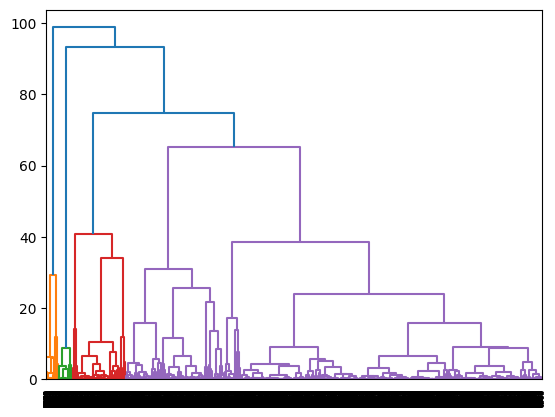

In [98]:
linkage_matrix = linkage(hierarchical_coordinates_sample[["scaled_lat", "scaled_long"]], method='ward')
dendrogram(
    linkage_matrix,
    truncate_mode='level',
    p=30
)

plt.show()

In [ ]:
hierarchical_coordinates_sample["silhouette_score"] = silhouette_samples(
    hierarchical_coordinates_sample[["scaled_lat", "scaled_long"]],
    hierarchical_coordinates_sample["agglomerative_clusters_ward"])

filtered_hierarchical = hierarchical_coordinates_sample[hierarchical_coordinates_sample["silhouette_score"]>0.1]
number_of_samples_by_cluster = hierarchical_coordinates_sample.groupby("agglomerative_clusters_ward").count()
too_small_clusters_id = number_of_samples_by_cluster[number_of_samples_by_cluster["id"] < 10].index
filtered_hierarchical = filtered_hierarchical[~filtered_hierarchical["agglomerative_clusters_ward"].isin(too_small_clusters_id)]
filtered_hierarchical = filtered_hierarchical.sample(2000)
nb_clusters = filtered_hierarchical["agglomerative_clusters_ward"].nunique()


m = folium.Map([45.762611,4.832805], zoom_start=12)
colors = plt.cm.get_cmap("hsv", nb_clusters)
cluster_colors = {cluster: f"#{int(colors(i)[0]*255):02x}{int(colors(i)[1]*255):02x}{int(colors(i)[2]*255):02x}" 
                  for i, cluster in enumerate(filtered_hierarchical["agglomerative_clusters_ward"].unique())}
for index, row in filtered_hierarchical.iterrows():
    cluster_color = cluster_colors[row["agglomerative_clusters_ward"]]
    folium.Marker(
        location=[row["lat"],row["long"]],
        popup=row["agglomerative_clusters_ward"],
        icon=folium.DivIcon(html=f"""<svg width="50px" height="50px" viewBox="0 0 24 24" fill="none" xmlns="http://www.w3.org/2000/svg">
        <path d="M12 9.5C13.3807 9.5 14.5 10.6193 14.5 12C14.5 13.3807 13.3807 14.5 12 14.5C10.6193 14.5 9.5 13.3807 9.5 12C9.5 10.6193 10.6193 9.5 12 9.5Z" fill="{cluster_color}"/>
        </svg>""")
    ).add_to(m)
    
m.save("hierarchical_clustering_cluster.html")

C:\Users\flofl\AppData\Local\Temp\ipykernel_11024\4072098096.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("hsv", nb_clusters)


Using threshold

In [198]:
hierarchical_coordinates_sample = scaled_coordinates_df.sample(1000)


In [ ]:
def find_best_threshold( thresholds ):
    silhouette_scores = []
    n_clusters_list = []

    for threshold in thresholds:

        agglomerative_clustering = AgglomerativeClustering(
            n_clusters=None, distance_threshold=threshold
        ).fit(hierarchical_coordinates_sample[["scaled_lat", "scaled_long"]])
        
        labels = agglomerative_clustering.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_clusters_list.append(n_clusters)

        if n_clusters > 1:
            score = silhouette_score(hierarchical_coordinates_sample[["scaled_lat", "scaled_long"]], labels)
        else:
            score = -1
        silhouette_scores.append(score)

    df = pd.DataFrame({"scores": silhouette_scores, "nb_clust": n_clusters_list})
    return(df)

In [ ]:
thresholds = np.linspace(0.1, 6.0, 1000)
hierarchical_silhouette_test1 = find_best_threshold(thresholds)

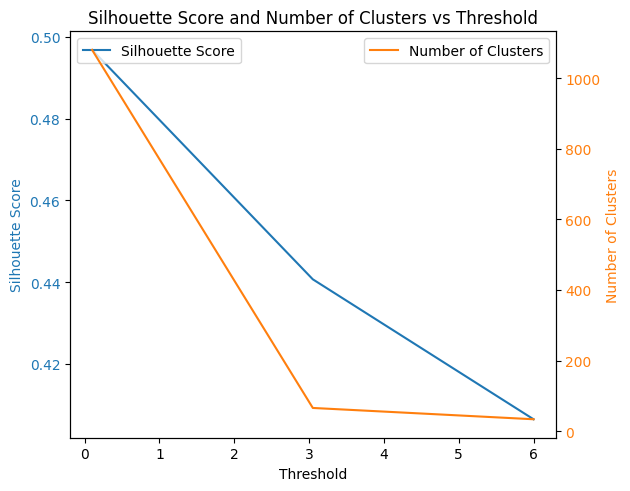

In [182]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Threshold')
ax1.set_ylabel('Silhouette Score', color=color)
ax1.plot(thresholds, hierarchical_silhouette_test1["scores"], label='Silhouette Score', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Number of Clusters', color=color)
ax2.plot(thresholds, hierarchical_silhouette_test1["nb_clust"], label='Number of Clusters', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()
plt.title('Silhouette Score and Number of Clusters vs Threshold')
plt.show()

It appears that silhouette score is higher for values of threshold between 0.1 and 1. Let's try plotting silhouette score again in this interval.

In [ ]:
thresholds = np.linspace(0.1, 1, 1000)
hierarchical_silhouette_test2 = find_best_threshold(thresholds)

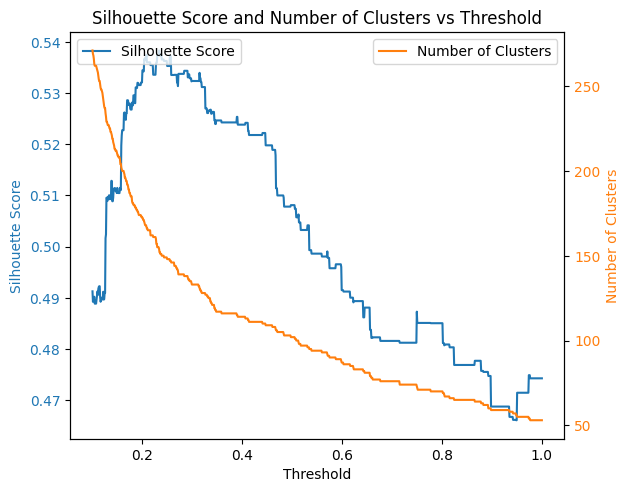

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Threshold')
ax1.set_ylabel('Silhouette Score', color=color)
ax1.plot(thresholds, hierarchical_silhouette_test2["scores"], label='Silhouette Score', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Number of Clusters', color=color)
ax2.plot(thresholds, hierarchical_silhouette_test2["nb_clust"], label='Number of Clusters', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()
plt.title('Silhouette Score and Number of Clusters vs Threshold')
plt.show()

There is no significant variation of silhouette score for low threshold. However, the number of clusters varies a lot. We can expect to have more than 100 clusters, thus picking a threshold value under 0.5. Besides we can check results with a threshold of 0.17 to maximize the number of clusters for our qualitative verification (which is the only remaining mean of verifiation).

To ensure that locations given by the clusters are precise enough, we can reject any sample with a low silhouette score. But with this filtering there is still some noise because of clusters containing few samples which are more likely to have greater silhouette score. As we suppose that small clusters aren't relevant we can remove them. 

In [184]:
def find_best_threshold2( thresholds ):
    silhouette_scores = []
    n_clusters_list = []
    min_silhouette_list = []

    for threshold in thresholds:

        agglomerative_clustering = AgglomerativeClustering(
            n_clusters=None, distance_threshold=threshold
        ).fit(hierarchical_coordinates_sample[["scaled_lat", "scaled_long"]])
        
        labels = agglomerative_clustering.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_clusters_list.append(n_clusters)

        if n_clusters > 1:
            score = silhouette_score(hierarchical_coordinates_sample[["scaled_lat", "scaled_long"]], labels)
            silhouettes_vector = silhouette_samples(hierarchical_coordinates_sample[["scaled_lat", "scaled_long"]], labels)
            silhouettes_df = pd.DataFrame({"labels": labels, "silhouette_scores": silhouettes_vector})
            silhouettes_df = silhouettes_df[silhouettes_df["silhouette_scores"] > 0]
            max_silhouette_list = silhouettes_df.groupby("labels")["silhouette_scores"].max().values
            min_silhouette_list.append(max_silhouette_list.min())
        else:
            score = -1
        silhouette_scores.append(score)
    df = pd.DataFrame({"scores": silhouette_scores, "min_silhouettes": min_silhouette_list})
    return(df)

In [201]:
thresholds = np.linspace(0.1, 1, 100)
hierarchical_silhouette_test2 = find_best_threshold2(thresholds)

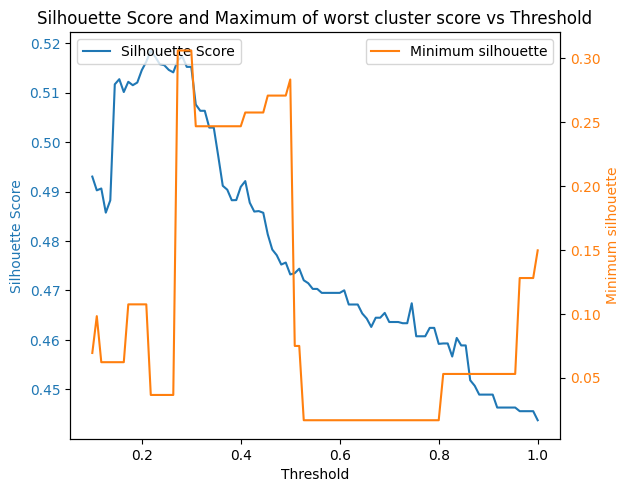

In [202]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Threshold')
ax1.set_ylabel('Silhouette Score', color=color)
ax1.plot(thresholds, hierarchical_silhouette_test2["scores"], label='Silhouette Score', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Minimum silhouette', color=color)
ax2.plot(thresholds, hierarchical_silhouette_test2["min_silhouettes"], label='Minimum silhouette', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()
plt.title('Silhouette Score and Maximum of worst cluster score vs Threshold')
plt.show()

In [205]:
hierarchical_coordinates_sample = scaled_coordinates_df.sample(10000)

agglomerative_clustering = AgglomerativeClustering(n_clusters=147,distance_threshold=None).fit(hierarchical_coordinates_sample[["scaled_lat", "scaled_long"]])
labels = agglomerative_clustering.labels_
hierarchical_coordinates_sample["agglomerative_clusters"] = labels
hierarchical_coordinates_sample["agglomerative_clusters"].nunique()

hierarchical_coordinates_sample["silhouette_score"] = silhouette_samples(
    hierarchical_coordinates_sample[["scaled_lat", "scaled_long"]],
    hierarchical_coordinates_sample["agglomerative_clusters"])

In [ ]:
filtered_hierarchical = hierarchical_coordinates_sample[hierarchical_coordinates_sample["silhouette_score"]>0]

number_of_samples_by_cluster = hierarchical_coordinates_sample.groupby("agglomerative_clusters").count()
too_small_clusters_id = number_of_samples_by_cluster[number_of_samples_by_cluster["id"] < 10].index
filtered_hierarchical = filtered_hierarchical[~filtered_hierarchical["agglomerative_clusters"].isin(too_small_clusters_id)]
filtered_hierarchical = filtered_hierarchical.sample(2000)


nb_clusters = filtered_hierarchical["agglomerative_clusters"].nunique()

147


In [207]:
m = folium.Map([45.762611,4.832805], zoom_start=12)

colors = plt.cm.get_cmap("hsv", nb_clusters)

cluster_colors = {cluster: f"#{int(colors(i)[0]*255):02x}{int(colors(i)[1]*255):02x}{int(colors(i)[2]*255):02x}" 
                  for i, cluster in enumerate(filtered_hierarchical["agglomerative_clusters"].unique())}

for index, row in filtered_hierarchical.iterrows():
    cluster_color = cluster_colors[row["agglomerative_clusters"]]
    folium.Marker(
        location=[row["lat"],row["long"]],
        popup=row["agglomerative_clusters"],
        icon=folium.DivIcon(html=f"""<svg width="50px" height="50px" viewBox="0 0 24 24" fill="none" xmlns="http://www.w3.org/2000/svg">
        <path d="M12 9.5C13.3807 9.5 14.5 10.6193 14.5 12C14.5 13.3807 13.3807 14.5 12 14.5C10.6193 14.5 9.5 13.3807 9.5 12C9.5 10.6193 10.6193 9.5 12 9.5Z" fill="{cluster_color}"/>
        </svg>""")
    ).add_to(m)

m.save("hierarchical_clustering_threshold.html")

C:\Users\flofl\AppData\Local\Temp\ipykernel_7088\2684136299.py:3: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



## Task 7: Apply DBSCAN

**QUESTIONS**

* Apply [sklearn.cluster.DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) algorithm
* Identify the best values for `eps` and `min_sanples` by varying the values within a range and by using Silhouette coefficient
* Apply DBSCAN with the best parameters found
* Print number of clusters and noise points

In [24]:
# DBSCAN
from sklearn.cluster import DBSCAN

In [25]:
DBSCAN_coordinates_sample = scaled_coordinates_df.sample(30000)

Defining min sample hyperparameter

In [128]:
min_sample = 20

Clustering using euclidian distance on normalized data.

In [37]:
from sklearn.neighbors import NearestNeighbors
import plotly.express as px 

In [ ]:
def find_optimal_eps(data, min_pts):
    # Calculate distances to k-nearest neighbors
    # need to add 1 to k as this function also return distance to itself 
    neigh = NearestNeighbors(n_neighbors=min_pts+1)
    neigh.fit(data)
    distances, _ = neigh.kneighbors(data)
    
    
    # Sort distances to kth neighbor in ascending order
    k_distances = np.sort(distances[:, min_pts-1])
    
    # Create plot
    fig = px.line(
        x=range(len(k_distances)),
        y=k_distances,
        title=f'K-distance Graph (k={min_pts})',
        labels={'x': 'Points sorted by distance', 
                'y': f'Distance to {min_pts}th nearest neighbor'}
    )
    
    return fig

In [153]:
fig = find_optimal_eps(DBSCAN_coordinates_sample[["scaled_lat", "scaled_long"]], 20)
fig.show() # display the plot

In [160]:
clustering = DBSCAN(eps=0.0145, min_samples=20).fit(DBSCAN_coordinates_sample[["scaled_lat", "scaled_long"]])
labels = clustering.labels_
DBSCAN_coordinates_sample["DBSCAN_clusters"] = labels
DBSCAN_coordinates_sample["DBSCAN_clusters"].nunique()

DBSCAN_coordinates_sample["silhouette_score"] = silhouette_samples(
    DBSCAN_coordinates_sample[["scaled_lat", "scaled_long"]],
    DBSCAN_coordinates_sample["DBSCAN_clusters"])

In [161]:
filtered_DBSCAN = DBSCAN_coordinates_sample[DBSCAN_coordinates_sample["DBSCAN_clusters"] != -1]
filtered_DBSCAN = filtered_DBSCAN.sample(2000)
nb_clusters = filtered_DBSCAN["DBSCAN_clusters"].nunique()

m = folium.Map([45.762611,4.832805], zoom_start=12)

colors = plt.cm.get_cmap("hsv", nb_clusters)

cluster_colors = {cluster: f"#{int(colors(i)[0]*255):02x}{int(colors(i)[1]*255):02x}{int(colors(i)[2]*255):02x}" 
                  for i, cluster in enumerate(filtered_DBSCAN["DBSCAN_clusters"].unique())}

for index, row in filtered_DBSCAN.iterrows():
    cluster_color = cluster_colors[row["DBSCAN_clusters"]]
    folium.Marker(
        location=[row["lat"],row["long"]],
        popup=row["DBSCAN_clusters"],
        icon=folium.DivIcon(html=f"""<svg width="50px" height="50px" viewBox="0 0 24 24" fill="none" xmlns="http://www.w3.org/2000/svg">
        <path d="M12 9.5C13.3807 9.5 14.5 10.6193 14.5 12C14.5 13.3807 13.3807 14.5 12 14.5C10.6193 14.5 9.5 13.3807 9.5 12C9.5 10.6193 10.6193 9.5 12 9.5Z" fill="{cluster_color}"/>
        </svg>""")
    ).add_to(m)

# save the map
m.save("dbscan_clustering.html")

C:\Users\flofl\AppData\Local\Temp\ipykernel_7088\3242576109.py:7: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



Clustering using haversine distance metric

In [29]:
delta_lat = DBSCAN_coordinates_sample["lat"].max()-DBSCAN_coordinates_sample["lat"].min()
delta_long = DBSCAN_coordinates_sample["long"].max()-DBSCAN_coordinates_sample["long"].min()

print(delta_lat, delta_long)

delta_long_rad = np.pi * delta_long /180

earth_diameter = 12756
euclidian_dist = earth_diameter/2*np.sin(delta_long_rad)
haversine_dist = earth_diameter/2*delta_long_rad
ratio = (haversine_dist-euclidian_dist)/haversine_dist*100

print(euclidian_dist, haversine_dist)
print(f"Percentage of error using Euclidian distance versus haversine: {ratio:.4f}%")

0.1971459999999965 0.28225300000000075
31.419458258446546 31.41958533942214
Percentage of error using Euclidian distance versus haversine: 0.0004%


In [96]:
DBSCAN_coordinates_sample = scaled_coordinates_df.sample(30000)
DBSCAN_coordinates_sample["lat_rad"] = np.radians(DBSCAN_coordinates_sample["lat"])
DBSCAN_coordinates_sample["long_rad"] = np.radians(DBSCAN_coordinates_sample["long"])

clustering = DBSCAN(eps=0.0000059, min_samples=20, metric="haversine", algorithm="ball_tree").fit(DBSCAN_coordinates_sample[["lat_rad", "long_rad"]])
labels = clustering.labels_
DBSCAN_coordinates_sample["DBSCAN_clusters"] = labels
DBSCAN_coordinates_sample["DBSCAN_clusters"].nunique()

DBSCAN_coordinates_sample["silhouette_score"] = silhouette_samples(
    DBSCAN_coordinates_sample[["lat", "lat"]],
    DBSCAN_coordinates_sample["DBSCAN_clusters"])

In [97]:
filtered_DBSCAN = DBSCAN_coordinates_sample[DBSCAN_coordinates_sample["DBSCAN_clusters"] != -1]
filtered_DBSCAN = filtered_DBSCAN.sample(2000)
nb_clusters = filtered_DBSCAN["DBSCAN_clusters"].nunique()

m = folium.Map([45.762611,4.832805], zoom_start=12)

colors = plt.cm.get_cmap("hsv", nb_clusters)

cluster_colors = {cluster: f"#{int(colors(i)[0]*255):02x}{int(colors(i)[1]*255):02x}{int(colors(i)[2]*255):02x}" 
                  for i, cluster in enumerate(filtered_DBSCAN["DBSCAN_clusters"].unique())}

for index, row in filtered_DBSCAN.iterrows():
    cluster_color = cluster_colors[row["DBSCAN_clusters"]]
    folium.Marker(
        location=[row["lat"],row["long"]],
        popup=row["DBSCAN_clusters"],
        icon=folium.DivIcon(html=f"""<svg width="50px" height="50px" viewBox="0 0 24 24" fill="none" xmlns="http://www.w3.org/2000/svg">
        <path d="M12 9.5C13.3807 9.5 14.5 10.6193 14.5 12C14.5 13.3807 13.3807 14.5 12 14.5C10.6193 14.5 9.5 13.3807 9.5 12C9.5 10.6193 10.6193 9.5 12 9.5Z" fill="{cluster_color}"/>
        </svg>""")
    ).add_to(m)

# save the map
m.save("dbscan_clustering_haversine.html")

C:\Users\flofl\AppData\Local\Temp\ipykernel_7088\3790815174.py:7: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



## Text pattern mining

First, let's intall and import the necessary python libraries

In [292]:
! pip install nltk
! pip install wordcloud


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [293]:
import nltk
import re
from nltk.corpus import stopwords

from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer


$ Preprocessing $

We're going to visualize the global tags we can encounter in the dataset. To do so we'll be using a word cloud.

Counter({'lyon': 17273, 'france': 11142, 'europe': 2803, 'square': 2711, 'squareformat': 2628, 'iphoneography': 2628, 'instagramapp': 2617, 'uploaded:by=instagram': 2594, 'streetart': 2330, 'rhône': 2297, 'architecture': 2076, 'rhônealpes': 1693, 'croixrousse': 1422, 'art': 1333, 'museum': 1177, 'portrait': 1125, 'demeureduchaos': 1123, 'abodeofchaos': 1118, 'nuit': 1071, 'night': 1041, 'thierryehrmann': 1017, 'sculpture': 1002, 'painting': 981, 'rhone': 956, 'city': 945, 'alchemy': 935, 'contemporaryart': 927, 'organmuseum': 918, 'lespritdelasalamandre': 913, 'symbol': 907, 'prophecy': 905, 'graffiti': 901, 'mystery': 897, 'secret': 894, 'artprice': 893, 'salamanderspirit': 888, 'saintromainaumontdor': 888, 'ville': 883, 'sanctuary': 852, 'chaos': 850, 'ruins': 845, 'apocalypse': 840, 'cyberpunk': 834, '999': 829, 'nikon': 825, 'servergroup': 823, 'vanitas': 822, 'artistshouses': 819, 'maisondartiste': 813, 'prophétie': 810, 'ddc': 802, 'auvergnerhônealpes': 801, 'collage': 795, '911'

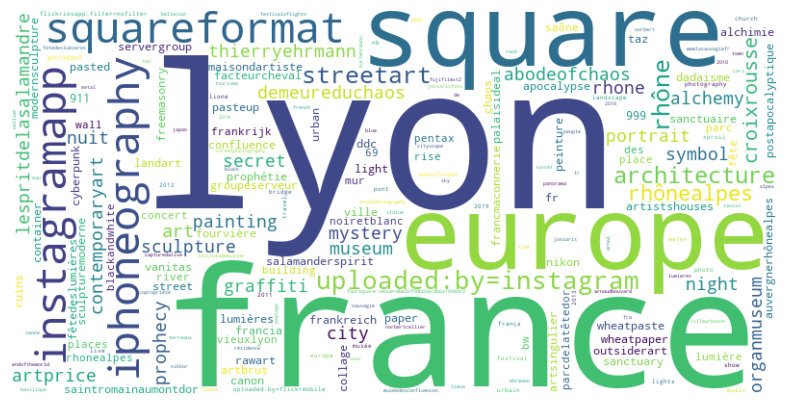

In [294]:
merged_df = pd.merge(DBSCAN_coordinates_sample, data_cleaned[['id', 'tags']], on='id', how='left')
merged_df = merged_df.dropna(subset=['tags'])


merged_df['tokenized_tags'] = merged_df['tags'].apply(lambda x: x.split(','))
all_tokens = [token for sublist in merged_df['tokenized_tags'] for token in sublist]
token_counts = Counter(all_tokens)
print(token_counts)


wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(token_counts)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


As we see it on the word cloud, several words could be removed as they are too general (e.g. Lyon) or irrelevant to our analysis (e.g. instagramapp) 
Thereby, we're going to make a filter that aims to :
- Remove words that appear too frequently in the dataset. Based on the previous counter, we'll put the limit to 1600 occurences. 
- Keep only alphabetic expressions, not numbers and languages based on other alphabets.
- Eventually remove french stopwords.

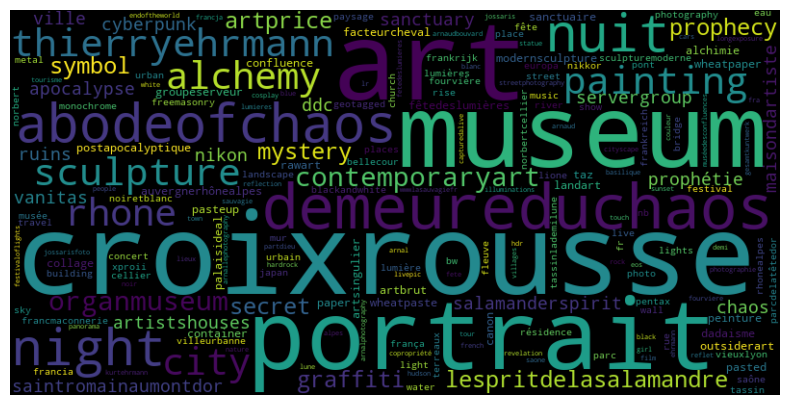

Counter({'croixrousse': 1422, 'art': 1333, 'museum': 1177, 'portrait': 1125, 'demeureduchaos': 1123, 'abodeofchaos': 1118, 'nuit': 1071, 'night': 1041, 'thierryehrmann': 1017, 'sculpture': 1002, 'painting': 981, 'rhone': 956, 'city': 945, 'alchemy': 935, 'contemporaryart': 927, 'organmuseum': 918, 'lespritdelasalamandre': 913, 'symbol': 907, 'prophecy': 905, 'graffiti': 901, 'mystery': 897, 'secret': 894, 'artprice': 893, 'salamanderspirit': 888, 'saintromainaumontdor': 888, 'ville': 883, 'sanctuary': 852, 'chaos': 850, 'ruins': 845, 'apocalypse': 840, 'cyberpunk': 834, 'nikon': 825, 'servergroup': 823, 'vanitas': 822, 'artistshouses': 819, 'maisondartiste': 813, 'prophétie': 810, 'ddc': 802, 'auvergnerhônealpes': 801, 'collage': 795, 'modernsculpture': 793, 'dadaisme': 793, 'taz': 792, 'facteurcheval': 792, 'alchimie': 787, 'paper': 786, 'sanctuaire': 782, 'postapocalyptique': 781, 'wheatpaper': 777, 'pasted': 777, 'wheatpaste': 768, 'container': 762, 'peinture': 761, 'groupeserveur':

In [295]:
filter = {k: v for k, v in token_counts.items() if v > 1600 or not re.match(r'[^\W\d]*$', k) or k in stopwords.words('french') or re.match(r'[^a-zA-Z]*$', k)}

tokens_filtered = [token for token in all_tokens if token not in filter]
tokens_filtered = Counter(tokens_filtered)

wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(tokens_filtered)
# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

print(tokens_filtered)


$Term frequency$

Our first method to labelise our cluster will be to count the frequency of each word inside each clusters, and keep a maximum of the 5 most frequent words.

In [296]:
clustered_tags = merged_df.groupby('DBSCAN_clusters')['tokenized_tags'].apply(lambda x: [item for sublist in x for item in sublist])
clustered_tags = clustered_tags.reset_index()
clustered_tags = clustered_tags[clustered_tags["DBSCAN_clusters"] != -1]
clustered_tags

DBSCAN_clusters                                     tokenized_tags
1                  0  [lyon, vieux, lyon, vieux, square, squareforma...
2                  1  [france, church, kirche, rhône, eglise, france...
3                  2  [2016, mac, lyon, fdl, supermimil, art, bienna...
4                  3  [fujifilmxt10, lyon, parcdegerland, pont, brid...
5                  4  [architecture, bw, canon1740f4, canon6dmarkii,...
..               ...                                                ...
110              112  [square, squareformat, iphoneography, instagra...
111              113  [streetart, lyon, homme, lampadaire, sous, str...
112              114  [lyon, 201801, motozone69, motogone, enogotom,...
113              115  [blue, party, music, france, festival, campus,...
114              116  [car, autocar, tourisme, interurbain, volvo, 9...

[114 rows x 2 columns]

In [297]:
# remove the token of tokenized tags if it is in the filter
filtered_clustered_tags = clustered_tags.copy()
filtered_clustered_tags['tokenized_tags'] = filtered_clustered_tags['tokenized_tags'].apply(lambda x: [token for token in x if token not in filter])
#count the occurences of words in tokenized tags, keep only the most common ones and add them to the dataframe in a column "most frequent tags" 
filtered_clustered_tags['most_frequent_tags'] = filtered_clustered_tags['tokenized_tags'].apply(lambda x: Counter(x).most_common(5))
filtered_clustered_tags['most_frequent_tags'] = filtered_clustered_tags['most_frequent_tags'].apply(lambda x: [tag[0] for tag in x])
filtered_clustered_tags

DBSCAN_clusters                                     tokenized_tags  \
1                  0  [vieux, vieux, blackandwhite, bw, noiretblanc,...   
2                  1  [church, kirche, eglise, aves, oiseaux, greycr...   
3                  2  [mac, fdl, supermimil, art, biennaledelyon, ke...   
4                  3  [parcdegerland, pont, bridge, raymondbarre, pu...   
5                  4  [bw, nb, noiretblanc, tour, tourincity, city, ...   
..               ...                                                ...   
110              112  [xproii, landscape, cameras, ceiling, movie, l...   
111              113  [homme, lampadaire, sous, pasteup, collage, pa...   
112              114  [motogone, enogotom, life, planet, earth, worl...   
113              115  [blue, party, music, festival, campus, fire, c...   
114              116  [car, autocar, tourisme, interurbain, volvo, v...   

                                    most_frequent_tags  
1    [vieuxlyon, night, fêtedeslumières, city, fran...  
2           [parcdelatêtedor, zoo, parc, animal, bird]  
3    [internetdesobjets, iot, sido, art, citéintern...  
4    [pont, raymondbarre, bridge, pontraymondbarre,...  
5           [incity, tour, building, tower, garibaldi]  
..                                                 ...  
110  [lumière, musée, villa, frèreslumière, institu...  
111  [croixrousse, pasteup, collage, paper, wheatpa...  
112     [musée, confluence, saône, motogone, enogotom]  
113               [insa, blue, party, music, festival]  
114  [autocarexpo, car, autocar, tourisme, interurb...  

[114 rows x 3 columns]

In [298]:
DBSCAN_dataframe = pd.merge(DBSCAN_coordinates_sample, filtered_clustered_tags, on='DBSCAN_clusters', how='left')
DBSCAN_dataframe = DBSCAN_dataframe.dropna(subset=['most_frequent_tags'])
display_DBSCAN_dataframe = DBSCAN_dataframe.sample(2000)


In [299]:
m = folium.Map([45.762611,4.832805], zoom_start=12)

colors = plt.cm.get_cmap("hsv", nb_clusters)

cluster_colors = {cluster: f"#{int(colors(i)[0]*255):02x}{int(colors(i)[1]*255):02x}{int(colors(i)[2]*255):02x}" 
                  for i, cluster in enumerate(display_DBSCAN_dataframe["DBSCAN_clusters"].unique())}

for index, row in display_DBSCAN_dataframe.iterrows():
    cluster_color = cluster_colors[row["DBSCAN_clusters"]]
    folium.Marker(
        location=[row["lat"],row["long"]],
        popup=row["most_frequent_tags"],
        icon=folium.DivIcon(html=f"""<svg width="50px" height="50px" viewBox="0 0 24 24" fill="none" xmlns="http://www.w3.org/2000/svg">
        <path d="M12 9.5C13.3807 9.5 14.5 10.6193 14.5 12C14.5 13.3807 13.3807 14.5 12 14.5C10.6193 14.5 9.5 13.3807 9.5 12C9.5 10.6193 10.6193 9.5 12 9.5Z" fill="{cluster_color}"/>
        </svg>""")
    ).add_to(m)

m

C:\Users\flofl\AppData\Local\Temp\ipykernel_1796\1205631812.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("hsv", nb_clusters)


$TF-IDF$

Now, we're going to try the Term frequency and inverse document frequency method, which provides a score that shows how meaningful each word in a sentence is.

In [300]:
# trasform the tags into a string
clustered_tags['string_tags'] = clustered_tags['tokenized_tags'].apply(lambda x: ' '.join(x))

clustered_tags

DBSCAN_clusters                                     tokenized_tags  \
1                  0  [lyon, vieux, lyon, vieux, square, squareforma...   
2                  1  [france, church, kirche, rhône, eglise, france...   
3                  2  [2016, mac, lyon, fdl, supermimil, art, bienna...   
4                  3  [fujifilmxt10, lyon, parcdegerland, pont, brid...   
5                  4  [architecture, bw, canon1740f4, canon6dmarkii,...   
..               ...                                                ...   
110              112  [square, squareformat, iphoneography, instagra...   
111              113  [streetart, lyon, homme, lampadaire, sous, str...   
112              114  [lyon, 201801, motozone69, motogone, enogotom,...   
113              115  [blue, party, music, france, festival, campus,...   
114              116  [car, autocar, tourisme, interurbain, volvo, 9...   

                                           string_tags  
1    lyon vieux lyon vieux square squareformat ipho...  
2    france church kirche rhône eglise france lyon ...  
3    2016 mac lyon fdl supermimil art biennaledelyo...  
4    fujifilmxt10 lyon parcdegerland pont bridge ra...  
5    architecture bw canon1740f4 canon6dmarkii fran...  
..                                                 ...  
110  square squareformat iphoneography instagramapp...  
111  streetart lyon homme lampadaire sous streetart...  
112  lyon 201801 motozone69 motogone enogotom life ...  
113  blue party music france festival campus fire c...  
114  car autocar tourisme interurbain volvo 9700 vo...  

[114 rows x 3 columns]

In [301]:
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(clustered_tags['string_tags'])
df1 = pd.DataFrame(x.toarray(), columns=tfidf.get_feature_names_out())
df1

01  06102011  0628  0697  06novembre2010  0777  07getty  08122011  \
0    0.0       0.0   0.0   0.0             0.0   0.0      0.0  0.005594   
1    0.0       0.0   0.0   0.0             0.0   0.0      0.0  0.000000   
2    0.0       0.0   0.0   0.0             0.0   0.0      0.0  0.000000   
3    0.0       0.0   0.0   0.0             0.0   0.0      0.0  0.000000   
4    0.0       0.0   0.0   0.0             0.0   0.0      0.0  0.000000   
..   ...       ...   ...   ...             ...   ...      ...       ...   
109  0.0       0.0   0.0   0.0             0.0   0.0      0.0  0.000000   
110  0.0       0.0   0.0   0.0             0.0   0.0      0.0  0.000000   
111  0.0       0.0   0.0   0.0             0.0   0.0      0.0  0.000000   
112  0.0       0.0   0.0   0.0             0.0   0.0      0.0  0.000000   
113  0.0       0.0   0.0   0.0             0.0   0.0      0.0  0.000000   

     0864ea3c4b6aa60e0ffd14c9044eaecc  090909  ...     里昂舊城區   風景  黃之鋒  黑白照片  \
0                                 0.0     0.0  ...  0.002383  0.0  0.0   0.0   
1                                 0.0     0.0  ...  0.000000  0.0  0.0   0.0   
2                                 0.0     0.0  ...  0.000000  0.0  0.0   0.0   
3                                 0.0     0.0  ...  0.000000  0.0  0.0   0.0   
4                                 0.0     0.0  ...  0.000000  0.0  0.0   0.0   
..                                ...     ...  ...       ...  ...  ...   ...   
109                               0.0     0.0  ...  0.000000  0.0  0.0   0.0   
110                               0.0     0.0  ...  0.000000  0.0  0.0   0.0   
111                               0.0     0.0  ...  0.000000  0.0  0.0   0.0   
112                               0.0     0.0  ...  0.000000  0.0  0.0   0.0   
113                               0.0     0.0  ...  0.000000  0.0  0.0   0.0   

           리옹        유럽  쥘리앙   초록       프랑스  혼돈의거처  
0    0.009226  0.000000  0.0  0.0  0.007325    0.0  
1    0.000000  0.000000  0.0  0.0  0.000000    0.0  
2    0.000000  0.005373  0.0  0.0  0.003592    0.0  
3    0.000000  0.000000  0.0  0.0  0.000000    0.0  
4    0.000000  0.009934  0.0  0.0  0.006641    0.0  
..        ...       ...  ...  ...       ...    ...  
109  0.000000  0.000000  0.0  0.0  0.000000    0.0  
110  0.000000  0.000000  0.0  0.0  0.000000    0.0  
111  0.032790  0.000000  0.0  0.0  0.031239    0.0  
112  0.000000  0.000000  0.0  0.0  0.000000    0.0  
113  0.000000  0.000000  0.0  0.0  0.000000    0.0  

[114 rows x 15713 columns]

We'll then keep only the words with the best score for each cluster.

In [302]:
filtered_tokens_df = clustered_tags.copy()
filtered_tokens_df.reset_index(drop=True, inplace=True)
filtered_tokens_df['max_token'] = df1.idxmax(axis=1)
filtered_tokens_df

DBSCAN_clusters                                     tokenized_tags  \
0                  0  [lyon, vieux, lyon, vieux, square, squareforma...   
1                  1  [france, church, kirche, rhône, eglise, france...   
2                  2  [2016, mac, lyon, fdl, supermimil, art, bienna...   
3                  3  [fujifilmxt10, lyon, parcdegerland, pont, brid...   
4                  4  [architecture, bw, canon1740f4, canon6dmarkii,...   
..               ...                                                ...   
109              112  [square, squareformat, iphoneography, instagra...   
110              113  [streetart, lyon, homme, lampadaire, sous, str...   
111              114  [lyon, 201801, motozone69, motogone, enogotom,...   
112              115  [blue, party, music, france, festival, campus,...   
113              116  [car, autocar, tourisme, interurbain, volvo, 9...   

                                           string_tags          max_token  
0    lyon vieux lyon vieux square squareformat ipho...               lyon  
1    france church kirche rhône eglise france lyon ...    parcdelatêtedor  
2    2016 mac lyon fdl supermimil art biennaledelyo...  internetdesobjets  
3    fujifilmxt10 lyon parcdegerland pont bridge ra...       raymondbarre  
4    architecture bw canon1740f4 canon6dmarkii fran...          garibaldi  
..                                                 ...                ...  
109  square squareformat iphoneography instagramapp...      frèreslumière  
110  streetart lyon homme lampadaire sous streetart...          streetart  
111  lyon 201801 motozone69 motogone enogotom life ...               lyon  
112  blue party music france festival campus fire c...               insa  
113  car autocar tourisme interurbain volvo 9700 vo...        autocarexpo  

[114 rows x 4 columns]

As we can see, some clusters have bad labelization, having words like lyon and france with the best score. We're going to correct that by applying our filter.

In [303]:
filtered_clustered_tags['string_tags'] = filtered_clustered_tags['tokenized_tags'].apply(lambda x: ' '.join(x))
x = tfidf.fit_transform(filtered_clustered_tags['string_tags'])
df1 = pd.DataFrame(x.toarray(), columns=tfidf.get_feature_names_out())
filtered_tokens_df['max_token'] = df1.idxmax(axis=1)
filtered_tokens_df

DBSCAN_clusters                                     tokenized_tags  \
0                  0  [lyon, vieux, lyon, vieux, square, squareforma...   
1                  1  [france, church, kirche, rhône, eglise, france...   
2                  2  [2016, mac, lyon, fdl, supermimil, art, bienna...   
3                  3  [fujifilmxt10, lyon, parcdegerland, pont, brid...   
4                  4  [architecture, bw, canon1740f4, canon6dmarkii,...   
..               ...                                                ...   
109              112  [square, squareformat, iphoneography, instagra...   
110              113  [streetart, lyon, homme, lampadaire, sous, str...   
111              114  [lyon, 201801, motozone69, motogone, enogotom,...   
112              115  [blue, party, music, france, festival, campus,...   
113              116  [car, autocar, tourisme, interurbain, volvo, 9...   

                                           string_tags          max_token  
0    lyon vieux lyon vieux square squareformat ipho...          vieuxlyon  
1    france church kirche rhône eglise france lyon ...    parcdelatêtedor  
2    2016 mac lyon fdl supermimil art biennaledelyo...  internetdesobjets  
3    fujifilmxt10 lyon parcdegerland pont bridge ra...       raymondbarre  
4    architecture bw canon1740f4 canon6dmarkii fran...          garibaldi  
..                                                 ...                ...  
109  square squareformat iphoneography instagramapp...      frèreslumière  
110  streetart lyon homme lampadaire sous streetart...        croixrousse  
111  lyon 201801 motozone69 motogone enogotom life ...         confluence  
112  blue party music france festival campus fire c...               insa  
113  car autocar tourisme interurbain volvo 9700 vo...        autocarexpo  

[114 rows x 4 columns]

In [304]:
from scipy.spatial import ConvexHull


In [339]:

DBSCAN_tfidf_dataframe = pd.merge(DBSCAN_coordinates_sample, filtered_tokens_df, on='DBSCAN_clusters', how='left')
DBSCAN_tfidf_dataframe = DBSCAN_tfidf_dataframe.dropna(subset=['max_token'])

m = folium.Map([45.762611,4.832805], zoom_start=12)

colors = plt.cm.get_cmap("hsv", nb_clusters)

cluster_colors = {cluster: f"#{int(colors(i)[0]*255):02x}{int(colors(i)[1]*255):02x}{int(colors(i)[2]*255):02x}" 
                  for i, cluster in enumerate(DBSCAN_tfidf_dataframe["DBSCAN_clusters"].unique())}

list_of_points = []
for i in range (0, DBSCAN_tfidf_dataframe["DBSCAN_clusters"].max()+1):
    display_DBSCAN_tfidf_dataframe = DBSCAN_tfidf_dataframe[DBSCAN_tfidf_dataframe["DBSCAN_clusters"]==i]
    if len(display_DBSCAN_tfidf_dataframe) > 19:
        display_DBSCAN_tfidf_dataframe = display_DBSCAN_tfidf_dataframe.sample(19)
        if len(display_DBSCAN_tfidf_dataframe) > 50:
            display_DBSCAN_tfidf_dataframe = display_DBSCAN_tfidf_dataframe.sample(50)
        cluster = display_DBSCAN_tfidf_dataframe[["lat", "long"]]
        unique = cluster["lat"].nunique()
        if ( unique < 3):
            for index, row in display_DBSCAN_tfidf_dataframe.iterrows():
                cluster_color = cluster_colors[row["DBSCAN_clusters"]]
                folium.Marker(
                    location=[row["lat"],row["long"]],
                    popup=row["max_token"],
                    icon=folium.DivIcon(html=f"""<svg width="50px" height="50px" viewBox="0 0 24 24" fill="none" xmlns="http://www.w3.org/2000/svg">
                    <path d="M12 9.5C13.3807 9.5 14.5 10.6193 14.5 12C14.5 13.3807 13.3807 14.5 12 14.5C10.6193 14.5 9.5 13.3807 9.5 12C9.5 10.6193 10.6193 9.5 12 9.5Z" fill="{cluster_color}"/>
                    </svg>""")
                ).add_to(m)
        else:
            form = [[cluster.iloc[i]["lat"],cluster.iloc[i]["long"]] for i in ConvexHull(cluster).vertices]
            folium.Polygon(
                locations=form, 
                color=cluster_colors[display_DBSCAN_tfidf_dataframe.iloc[0]["DBSCAN_clusters"]], 
                fill_color=cluster_colors[display_DBSCAN_tfidf_dataframe.iloc[0]["DBSCAN_clusters"]], 
                fill_opacity=0.5,
                popup=display_DBSCAN_tfidf_dataframe.iloc[0]["max_token"]
            ).add_to(m)


m

C:\Users\flofl\AppData\Local\Temp\ipykernel_1796\1408653284.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("hsv", nb_clusters)


Transition analyse avec le temps


In [186]:
merged_df

# apriori algorithm

id        lat      long  scaled_lat  scaled_long  \
0       6886958520  45.760352  4.825959   -0.170592    -0.393489   
1       8253334900  45.760442  4.835684   -0.166729    -0.065667   
2       8253334900  45.760442  4.835684   -0.166729    -0.065667   
4      33784779268  45.759057  4.839906   -0.226183     0.076654   
5      33784779268  45.759057  4.839906   -0.226183     0.076654   
...            ...        ...       ...         ...          ...   
36466   7058792323  45.767695  4.835078    0.144624    -0.086094   
36467   7058792323  45.767695  4.835078    0.144624    -0.086094   
36468  44894611885  45.766351  4.833555    0.086930    -0.137434   
36469  44894611885  45.766351  4.833555    0.086930    -0.137434   
36470  34848495653  45.733444  4.818706   -1.325684    -0.637982   

       k_means_clusters  DBSCAN_clusters  silhouette_score  \
0                     5                0         -0.306658   
1                     0                1          0.514803   
2                     0                1          0.514803   
4                     0               -1         -0.965880   
5                     0               -1         -0.965880   
...                 ...              ...               ...   
36466                 5                8          0.270997   
36467                 5                8          0.270997   
36468                 5                8         -0.083615   
36469                 5                8         -0.083615   
36470                 4                6          0.397787   

                                                    tags  \
0      france,colors,lyon,asiantourists,colorsfrommemory   
1                               lyon,2012,fêtedelumières   
2                               lyon,2012,fêtedelumières   
4             lyon,france,swan,cygne,animal,macro,nature   
5             lyon,france,swan,cygne,animal,macro,nature   
...                                                  ...   
36466  nikon,lyon,hoteldeville,nikkor,d800,knar,stree...   
36467  nikon,lyon,hoteldeville,nikkor,d800,knar,stree...   
36468  lyon,muséedesbeauxartslyon,mba,mbalyon,alfredm...   
36469  lyon,muséedesbeauxartslyon,mba,mbalyon,alfredm...   
36470  architecture,architectureetbatiments,batiments...   

                                          tokenized_tags  
0      [france, colors, lyon, asiantourists, colorsfr...  
1                           [lyon, 2012, fêtedelumières]  
2                           [lyon, 2012, fêtedelumières]  
4      [lyon, france, swan, cygne, animal, macro, nat...  
5      [lyon, france, swan, cygne, animal, macro, nat...  
...                                                  ...  
36466  [nikon, lyon, hoteldeville, nikkor, d800, knar...  
36467  [nikon, lyon, hoteldeville, nikkor, d800, knar...  
36468  [lyon, muséedesbeauxartslyon, mba, mbalyon, al...  
36469  [lyon, muséedesbeauxartslyon, mba, mbalyon, al...  
36470  [architecture, architectureetbatiments, batime...  

[26696 rows x 10 columns]